In [5]:
import neat

# 2-input XOR inputs and expected outputs.
xor_inputs = [(0.0, 0.0), (0.0, 1.0), (1.0, 0.0), (1.0, 1.0)]
xor_outputs = [(0.0,), (1.0,), (1.0,), (0.0,)]

def eval_genomes(genomes, config):
    """ 
    Eval function taking list of "genome" and "config" as input 
    - genome: genotype of individual network
    - config: config file
    - neat.nn.FeedForwardNetwork.create(genome, config) to initialize neural network 
    - net.activate(xi) to get output of neural network
        
    4 test cases, perfect fitness 4.0
    sub-optimal solution subtracts from such perfect fitness score
    sigmoid activated output [0, 1] target [0, 1], squared error [0, 1]
    fitness range [0, 4]
    """
    for genome_id, genome in genomes:
        genome.fitness = 4.0 
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        for xi, xo in zip(xor_inputs, xor_outputs):
            output = net.activate(xi)
            genome.fitness -= (output[0] - xo[0]) ** 2 
            
# load config             
config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                     neat.DefaultSpeciesSet, neat.DefaultStagnation, 
                     "config-feedforward")

# initialize population 
p = neat.Population(config)

# Add statistics reporter
stats = neat.StatisticsReporter()
p.add_reporter(stats)
p.add_reporter(neat.StdOutReporter(False))

winner = p.run(eval_genomes)



 ****** Running generation 0 ****** 

Population's average fitness: 2.22387 stdev: 0.32982
Best fitness: 2.98752 - size: (1, 2) - species 1 - id 101
Average adjusted fitness: 0.530
Mean genetic distance 1.131, standard deviation 0.413
Population of 150 members in 1 species
Total extinctions: 0
Generation time: 0.008 sec

 ****** Running generation 1 ****** 

Population's average fitness: 2.35643 stdev: 0.30909
Best fitness: 2.99524 - size: (1, 2) - species 1 - id 191
Average adjusted fitness: 0.555
Mean genetic distance 1.262, standard deviation 0.466
Population of 150 members in 1 species
Total extinctions: 0
Generation time: 0.006 sec (0.007 average)

 ****** Running generation 2 ****** 

Population's average fitness: 2.34797 stdev: 0.33511
Best fitness: 2.99719 - size: (1, 2) - species 1 - id 396
Average adjusted fitness: 0.484
Mean genetic distance 1.420, standard deviation 0.487
Population of 150 members in 1 species
Total extinctions: 0
Generation time: 0.006 sec (0.007 average)

#### Visualization of NEAT-network

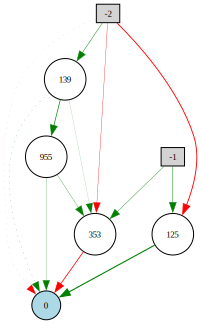

In [6]:
# print('\nBest genome:\n{!s}'.format(winner))
genome = winner
from visualize import draw_net
draw_net(config, genome)


In [7]:
from visualize import plot_species
plot_species(stats)


In [15]:
# Add this to inspect the genome structure
print("\nConnection genes:")
for conn in winner.connections.values():
    break
    print(f"Connection: {conn.key} -> Innovation: {conn.innovation}")
    
print("\nNode genes:")
for node in winner.nodes.keys():
    print(f"Node innovation number: {node}")


Connection genes:

Node genes:
Node innovation number: 0
Node innovation number: 159
Node innovation number: 1279
